In [1]:
#Stephanie Hartje - Project 1 - Bechdel Scores Over Time

In [2]:
%matplotlib inline

In [3]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [4]:
#Read clean data file
df = pd.read_csv("../Data/clean_data.csv")
del df['Unnamed: 0']
df.head()

,Actors,Awards,BoxOffice,Country,DVD,Director,Genre,Language,Metascore,Plot,...,Released,Runtime,Title,Website,Writer,Year,imdbID,imdbRating,imdbVotes,rating
0,"Charlize Theron, Christina Ricci, Bruce Dern, ...",Won 1 Oscar. Another 29 wins & 25 nominations.,"$34,187,787","Germany, USA",01 Jun 2004,Patty Jenkins,"Biography, Crime, Drama, Thriller",English,74.0,"Based on the life of Aileen Wuornos, a Daytona...",...,30 Jan 2004,109 min,Monster,http://www.monsterfilm.com/,Patty Jenkins,2003,tt0340855,7.3,"123,001",3
1,"Devon Alan, Laura Harris, Zooey Deschanel, Mar...",1 nomination.,NaN,"Canada, USA",NaN,Marcel Sarmiento,NaN,English,NaN,NaN,...,01 Apr 2003,127 min,It's Better to Be Wanted for Murder Than Not t...,NaN,Marcel Sarmiento,2003,tt0339882,6.6,31,1
2,"Halle Berry, Robert Downey Jr., Charles S. Dut...",3 wins & 7 nominations.,"$59,537,388","USA, France, Canada, Spain",23 Mar 2004,Mathieu Kassovitz,"Horror, Mystery, Thriller",English,38.0,A repressed female psychiatrist wakes up as a ...,...,21 Nov 2003,98 min,Gothika,http://gothikamovie.warnerbros.com/,Sebastian Gutierrez,2003,tt0348836,5.8,"99,552",3
3,"Sean Connery, Naseeruddin Shah, Peta Wilson, T...",12 nominations.,"$66,327,144","USA, Germany, Czech Republic, UK",16 Dec 2003,Stephen Norrington,"Action, Adventure, Fantasy, Sci-Fi","English, German, Italian",30.0,"In an alternate Victorian Age world, a group o...",...,11 Jul 2003,110 min,The League of Extraordinary Gentlemen,http://www.lxgmovie.com,"Alan Moore (comic books), Kevin O'Neill (comic...",2003,tt0311429,5.8,"156,033",0
4,"Pamela Anderson, Jenny McCarthy, Marny Eng, Ch...",2 wins & 4 nominations.,NaN,"USA, Canada",11 May 2004,David Zucker,Comedy,English,49.0,Cindy must investigate mysterious crop circles...,...,24 Oct 2003,84 min,Scary Movie 3,http://www.scarymovie.com/sm3_home.html,"Craig Mazin, Pat Proft, Shawn Wayans (characte...",2003,tt0306047,5.5,"126,494",3


In [5]:
#Sort dataframe by year of release
sort_by_year = df.sort_values("Year")
sort_by_year.head()

,Actors,Awards,BoxOffice,Country,DVD,Director,Genre,Language,Metascore,Plot,...,Released,Runtime,Title,Website,Writer,Year,imdbID,imdbRating,imdbVotes,rating
3539,"Annie Hartley, Adolphe Le Prince, Joseph Whitl...",NaN,NaN,"UK, France",NaN,Louis Aimé Augustin Le Prince,"Documentary, Short",NaN,NaN,"In the garden, a man asks his friends to do so...",...,14 Oct 1888,1 min,Roundhay Garden Scene,NaN,NaN,1888,tt0392728,7.5,"4,609",0
3540,NaN,NaN,NaN,France,NaN,Émile Reynaud,"Animation, Comedy, Short",NaN,NaN,"One night, Arlequin come to see his lover Colo...",...,28 Oct 1892,4 min,Pauvre Pierrot,NaN,NaN,1892,tt0000003,6.6,860,0
3541,"François Clerc, Benoît Duval",NaN,NaN,France,NaN,Louis Lumière,"Comedy, Short",NaN,NaN,"A gardener is watering his flowers, when a mis...",...,NaN,1 min,Tables Turned on the Gardener,NaN,NaN,1895,tt0000014,7.2,"3,500",0
3542,Mrs. Robert L. Thomas,NaN,NaN,USA,NaN,Alfred Clark,"Short, History, Horror",NaN,NaN,"This short film, one of the first to use camer...",...,28 Aug 1895,1 min,"The Execution of Mary, Queen of Scots",NaN,NaN,1895,tt0132134,6.7,"1,543",0
3543,Georges Méliès,NaN,NaN,France,NaN,Georges Méliès,"Short, Comedy, Horror",NaN,NaN,"A man tries to get a good night's sleep, but i...",...,NaN,1 min,A Terrible Night,NaN,NaN,1896,tt0000131,5.8,730,0


In [35]:
#Group dataframe by year and calculate mean
GroupBy_Year = sort_by_year.groupby("Year").mean()

#Convert to dataframe
Year_df = pd.DataFrame(GroupBy_Year["rating"])

#Reindex dataframe
Year_df = Year_df.reset_index()

#Show dataframe
Year_df

,Year,rating
0,1888,0.000000
1,1892,0.000000
2,1895,0.000000
3,1896,0.000000
4,1898,0.000000
5,1899,1.500000
6,1900,0.000000
7,1901,0.000000
8,1902,0.000000
9,1903,0.000000


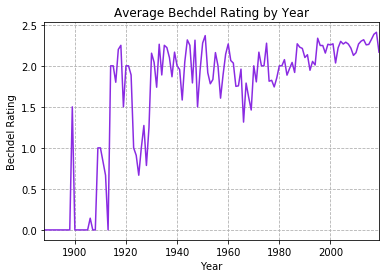

In [148]:
#Create axes
x_axis = Year_df["Year"]
y_axis = Year_df["rating"]

#Create line chart showing average Bechdel rating by year
Year_graph = plt.plot(x_axis, y_axis, color='blueviolet')

# Give our graph axis labels
plt.xlabel("Year")
plt.ylabel("Bechdel Rating")
plt.title("Average Bechdel Rating by Year")
plt.grid(linestyle = "--")
plt.xlim(1888,2019)
#plt.vlines(1918,0,3)
#plt.vlines(1925,0,3)
#plt.vlines(1930,0,3)

plt.savefig("SHartje_avg_BechdelbyYear.png")

Text(0, 0.5, 'Bechdel Rating')

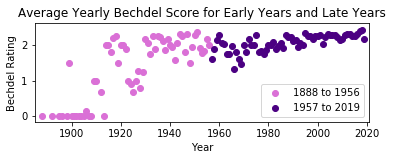

In [102]:
#Split data frame into early years and later years
EarlyYears_df = Year_df.iloc[:62]
LateYears_df = Year_df.iloc[62:]


population1 = EarlyYears_df["rating"]
population2 = LateYears_df["rating"]

# Scatter Plot of Data
plt.subplot(2, 1, 1)
plt.scatter(EarlyYears_df["Year"], population1, label="1888 to 1956", color = "orchid")
plt.scatter(LateYears_df["Year"], population2, label="1957 to 2019", color = "indigo")
plt.xlim(1885,2021)
plt.legend()

plt.title("Average Yearly Bechdel Score for Early Years and Late Years")
plt.xlabel("Year")
plt.ylabel("Bechdel Rating")

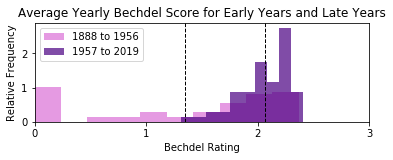

In [49]:
# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(population1, 10, density=True, alpha=0.7, label="1888 to 1956", color = "orchid")
plt.hist(population2, 10, density=True, alpha=0.7, label="1957 to 2019", color = "indigo")
plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
plt.xticks(range(0, 4))
plt.xlim([0, 3])
plt.legend()  

plt.title("Average Yearly Bechdel Score for Early Years and Late Years")
plt.xlabel("Bechdel Rating")
plt.ylabel("Relative Frequency")

plt.savefig("SHartje_EarlyvsLateYears.png")

In [44]:
stats.ttest_ind(population1, population2, equal_var=False)

Ttest_indResult(statistic=-6.2879002156989126, pvalue=2.478038324817492e-08)

In [46]:
EarlyYears_mean = population1.mean()
EarlyYears_mean

1.3478397753067464

In [47]:
LateYears_mean = population2.mean()
LateYears_mean

2.0684177575969165

In [8]:
#Create df with only the main genre listed (we have assumed the first genre in the list is the main genre)

#Turn entries in Genre column into a list
df["Genre"]=df["Genre"].str.split(",",n=-1,expand=False)

df.head()

,Actors,Awards,BoxOffice,Country,DVD,Director,Genre,Language,Metascore,Plot,...,Released,Runtime,Title,Website,Writer,Year,imdbID,imdbRating,imdbVotes,rating
0,"Charlize Theron, Christina Ricci, Bruce Dern, ...",Won 1 Oscar. Another 29 wins & 25 nominations.,"$34,187,787","Germany, USA",01 Jun 2004,Patty Jenkins,"[Biography, Crime, Drama, Thriller]",English,74.0,"Based on the life of Aileen Wuornos, a Daytona...",...,30 Jan 2004,109 min,Monster,http://www.monsterfilm.com/,Patty Jenkins,2003,tt0340855,7.3,"123,001",3
1,"Devon Alan, Laura Harris, Zooey Deschanel, Mar...",1 nomination.,NaN,"Canada, USA",NaN,Marcel Sarmiento,NaN,English,NaN,NaN,...,01 Apr 2003,127 min,It's Better to Be Wanted for Murder Than Not t...,NaN,Marcel Sarmiento,2003,tt0339882,6.6,31,1
2,"Halle Berry, Robert Downey Jr., Charles S. Dut...",3 wins & 7 nominations.,"$59,537,388","USA, France, Canada, Spain",23 Mar 2004,Mathieu Kassovitz,"[Horror, Mystery, Thriller]",English,38.0,A repressed female psychiatrist wakes up as a ...,...,21 Nov 2003,98 min,Gothika,http://gothikamovie.warnerbros.com/,Sebastian Gutierrez,2003,tt0348836,5.8,"99,552",3
3,"Sean Connery, Naseeruddin Shah, Peta Wilson, T...",12 nominations.,"$66,327,144","USA, Germany, Czech Republic, UK",16 Dec 2003,Stephen Norrington,"[Action, Adventure, Fantasy, Sci-Fi]","English, German, Italian",30.0,"In an alternate Victorian Age world, a group o...",...,11 Jul 2003,110 min,The League of Extraordinary Gentlemen,http://www.lxgmovie.com,"Alan Moore (comic books), Kevin O'Neill (comic...",2003,tt0311429,5.8,"156,033",0
4,"Pamela Anderson, Jenny McCarthy, Marny Eng, Ch...",2 wins & 4 nominations.,NaN,"USA, Canada",11 May 2004,David Zucker,[Comedy],English,49.0,Cindy must investigate mysterious crop circles...,...,24 Oct 2003,84 min,Scary Movie 3,http://www.scarymovie.com/sm3_home.html,"Craig Mazin, Pat Proft, Shawn Wayans (characte...",2003,tt0306047,5.5,"126,494",3


In [9]:
#drop any rows where Genre is NA
df = df.dropna(subset = ["Genre"])
df.head()

,Actors,Awards,BoxOffice,Country,DVD,Director,Genre,Language,Metascore,Plot,...,Released,Runtime,Title,Website,Writer,Year,imdbID,imdbRating,imdbVotes,rating
0,"Charlize Theron, Christina Ricci, Bruce Dern, ...",Won 1 Oscar. Another 29 wins & 25 nominations.,"$34,187,787","Germany, USA",01 Jun 2004,Patty Jenkins,"[Biography, Crime, Drama, Thriller]",English,74.0,"Based on the life of Aileen Wuornos, a Daytona...",...,30 Jan 2004,109 min,Monster,http://www.monsterfilm.com/,Patty Jenkins,2003,tt0340855,7.3,"123,001",3
2,"Halle Berry, Robert Downey Jr., Charles S. Dut...",3 wins & 7 nominations.,"$59,537,388","USA, France, Canada, Spain",23 Mar 2004,Mathieu Kassovitz,"[Horror, Mystery, Thriller]",English,38.0,A repressed female psychiatrist wakes up as a ...,...,21 Nov 2003,98 min,Gothika,http://gothikamovie.warnerbros.com/,Sebastian Gutierrez,2003,tt0348836,5.8,"99,552",3
3,"Sean Connery, Naseeruddin Shah, Peta Wilson, T...",12 nominations.,"$66,327,144","USA, Germany, Czech Republic, UK",16 Dec 2003,Stephen Norrington,"[Action, Adventure, Fantasy, Sci-Fi]","English, German, Italian",30.0,"In an alternate Victorian Age world, a group o...",...,11 Jul 2003,110 min,The League of Extraordinary Gentlemen,http://www.lxgmovie.com,"Alan Moore (comic books), Kevin O'Neill (comic...",2003,tt0311429,5.8,"156,033",0
4,"Pamela Anderson, Jenny McCarthy, Marny Eng, Ch...",2 wins & 4 nominations.,NaN,"USA, Canada",11 May 2004,David Zucker,[Comedy],English,49.0,Cindy must investigate mysterious crop circles...,...,24 Oct 2003,84 min,Scary Movie 3,http://www.scarymovie.com/sm3_home.html,"Craig Mazin, Pat Proft, Shawn Wayans (characte...",2003,tt0306047,5.5,"126,494",3
5,"Sylvie Testud, Kaori Tsuji, Tarô Suwa, Bison K...",5 wins & 2 nominations.,NaN,"France, Japan",06 Sep 2005,Alain Corneau,"[Comedy, Drama]","French, Japanese",75.0,A Belgian woman looks back on her year at a Ja...,...,12 Mar 2003,107 min,Fear and Trembling,http://www.cinemaguild.com/fearandtrembling/in...,"Amélie Nothomb (novel), Alain Corneau (scenario)",2003,tt0318725,7.1,"3,964",3


In [10]:
#reset index
df.reset_index(drop=True)
df.head()

,Actors,Awards,BoxOffice,Country,DVD,Director,Genre,Language,Metascore,Plot,...,Released,Runtime,Title,Website,Writer,Year,imdbID,imdbRating,imdbVotes,rating
0,"Charlize Theron, Christina Ricci, Bruce Dern, ...",Won 1 Oscar. Another 29 wins & 25 nominations.,"$34,187,787","Germany, USA",01 Jun 2004,Patty Jenkins,"[Biography, Crime, Drama, Thriller]",English,74.0,"Based on the life of Aileen Wuornos, a Daytona...",...,30 Jan 2004,109 min,Monster,http://www.monsterfilm.com/,Patty Jenkins,2003,tt0340855,7.3,"123,001",3
2,"Halle Berry, Robert Downey Jr., Charles S. Dut...",3 wins & 7 nominations.,"$59,537,388","USA, France, Canada, Spain",23 Mar 2004,Mathieu Kassovitz,"[Horror, Mystery, Thriller]",English,38.0,A repressed female psychiatrist wakes up as a ...,...,21 Nov 2003,98 min,Gothika,http://gothikamovie.warnerbros.com/,Sebastian Gutierrez,2003,tt0348836,5.8,"99,552",3
3,"Sean Connery, Naseeruddin Shah, Peta Wilson, T...",12 nominations.,"$66,327,144","USA, Germany, Czech Republic, UK",16 Dec 2003,Stephen Norrington,"[Action, Adventure, Fantasy, Sci-Fi]","English, German, Italian",30.0,"In an alternate Victorian Age world, a group o...",...,11 Jul 2003,110 min,The League of Extraordinary Gentlemen,http://www.lxgmovie.com,"Alan Moore (comic books), Kevin O'Neill (comic...",2003,tt0311429,5.8,"156,033",0
4,"Pamela Anderson, Jenny McCarthy, Marny Eng, Ch...",2 wins & 4 nominations.,NaN,"USA, Canada",11 May 2004,David Zucker,[Comedy],English,49.0,Cindy must investigate mysterious crop circles...,...,24 Oct 2003,84 min,Scary Movie 3,http://www.scarymovie.com/sm3_home.html,"Craig Mazin, Pat Proft, Shawn Wayans (characte...",2003,tt0306047,5.5,"126,494",3
5,"Sylvie Testud, Kaori Tsuji, Tarô Suwa, Bison K...",5 wins & 2 nominations.,NaN,"France, Japan",06 Sep 2005,Alain Corneau,"[Comedy, Drama]","French, Japanese",75.0,A Belgian woman looks back on her year at a Ja...,...,12 Mar 2003,107 min,Fear and Trembling,http://www.cinemaguild.com/fearandtrembling/in...,"Amélie Nothomb (novel), Alain Corneau (scenario)",2003,tt0318725,7.1,"3,964",3


In [11]:
#Cycle through rows and list in each row, keep only the first item in each list

main_genre = []

for index, row in df.iterrows():
    
    genre = row["Genre"]
    
    main_genre.append(genre[0])

#add list to dataframe
df["Main Genre"] = main_genre

#display preview of the dataframe
df.head()

,Actors,Awards,BoxOffice,Country,DVD,Director,Genre,Language,Metascore,Plot,...,Runtime,Title,Website,Writer,Year,imdbID,imdbRating,imdbVotes,rating,Main Genre
0,"Charlize Theron, Christina Ricci, Bruce Dern, ...",Won 1 Oscar. Another 29 wins & 25 nominations.,"$34,187,787","Germany, USA",01 Jun 2004,Patty Jenkins,"[Biography, Crime, Drama, Thriller]",English,74.0,"Based on the life of Aileen Wuornos, a Daytona...",...,109 min,Monster,http://www.monsterfilm.com/,Patty Jenkins,2003,tt0340855,7.3,"123,001",3,Biography
2,"Halle Berry, Robert Downey Jr., Charles S. Dut...",3 wins & 7 nominations.,"$59,537,388","USA, France, Canada, Spain",23 Mar 2004,Mathieu Kassovitz,"[Horror, Mystery, Thriller]",English,38.0,A repressed female psychiatrist wakes up as a ...,...,98 min,Gothika,http://gothikamovie.warnerbros.com/,Sebastian Gutierrez,2003,tt0348836,5.8,"99,552",3,Horror
3,"Sean Connery, Naseeruddin Shah, Peta Wilson, T...",12 nominations.,"$66,327,144","USA, Germany, Czech Republic, UK",16 Dec 2003,Stephen Norrington,"[Action, Adventure, Fantasy, Sci-Fi]","English, German, Italian",30.0,"In an alternate Victorian Age world, a group o...",...,110 min,The League of Extraordinary Gentlemen,http://www.lxgmovie.com,"Alan Moore (comic books), Kevin O'Neill (comic...",2003,tt0311429,5.8,"156,033",0,Action
4,"Pamela Anderson, Jenny McCarthy, Marny Eng, Ch...",2 wins & 4 nominations.,NaN,"USA, Canada",11 May 2004,David Zucker,[Comedy],English,49.0,Cindy must investigate mysterious crop circles...,...,84 min,Scary Movie 3,http://www.scarymovie.com/sm3_home.html,"Craig Mazin, Pat Proft, Shawn Wayans (characte...",2003,tt0306047,5.5,"126,494",3,Comedy
5,"Sylvie Testud, Kaori Tsuji, Tarô Suwa, Bison K...",5 wins & 2 nominations.,NaN,"France, Japan",06 Sep 2005,Alain Corneau,"[Comedy, Drama]","French, Japanese",75.0,A Belgian woman looks back on her year at a Ja...,...,107 min,Fear and Trembling,http://www.cinemaguild.com/fearandtrembling/in...,"Amélie Nothomb (novel), Alain Corneau (scenario)",2003,tt0318725,7.1,"3,964",3,Comedy


In [12]:
#Sort dataframe by year of release
sort_by_year = df.sort_values("Year")

#Group dataframe by year and calculate mean
GroupBy_Year_Genre = sort_by_year.groupby(["Main Genre", "Year"]).mean()

#Convert to dataframe
Year_Genre_df = pd.DataFrame(GroupBy_Year_Genre["rating"])

#Reindex dataframe
Year_Genre_df = Year_Genre_df.reset_index()

#Show list of unique Genres
Genres = Year_Genre_df["Main Genre"].unique()
Genres

array(['Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Short',
       'Thriller', 'War', 'Western'], dtype=object)

In [13]:
#Create a dataframe for each main genre
Action_df = Year_Genre_df.loc[Year_Genre_df["Main Genre"] == "Action"]
Adult_df = Year_Genre_df.loc[Year_Genre_df["Main Genre"] == "Adult"]
Adventure_df = Year_Genre_df.loc[Year_Genre_df["Main Genre"] == "Adventure"]
Animation_df = Year_Genre_df.loc[Year_Genre_df["Main Genre"] == "Animation"]
Biography_df = Year_Genre_df.loc[Year_Genre_df["Main Genre"] == "Biography"]
Comedy_df = Year_Genre_df.loc[Year_Genre_df["Main Genre"] == "Comedy"]
Crime_df = Year_Genre_df.loc[Year_Genre_df["Main Genre"] == "Crime"]
Documentary_df = Year_Genre_df.loc[Year_Genre_df["Main Genre"] == "Documentary"]
Drama_df = Year_Genre_df.loc[Year_Genre_df["Main Genre"] == "Drama"]
Family_df = Year_Genre_df.loc[Year_Genre_df["Main Genre"] == "Family"]
Fantasy_df = Year_Genre_df.loc[Year_Genre_df["Main Genre"] == "Fantasy"]
FilmNoir_df = Year_Genre_df.loc[Year_Genre_df["Main Genre"] == "Film-Noir"]
Horror_df = Year_Genre_df.loc[Year_Genre_df["Main Genre"] == "Horror"]
Musical_df = Year_Genre_df.loc[Year_Genre_df["Main Genre"] == "Musical"]
Mystery_df = Year_Genre_df.loc[Year_Genre_df["Main Genre"] == "Mystery"]
Romance_df = Year_Genre_df.loc[Year_Genre_df["Main Genre"] == "Romance"]
SciFi_df = Year_Genre_df.loc[Year_Genre_df["Main Genre"] == "Sci-Fi"]
Short_df = Year_Genre_df.loc[Year_Genre_df["Main Genre"] == "Short"]
Thriller_df = Year_Genre_df.loc[Year_Genre_df["Main Genre"] == "Thriller"]
War_df = Year_Genre_df.loc[Year_Genre_df["Main Genre"] == "War"]
Western_df = Year_Genre_df.loc[Year_Genre_df["Main Genre"] == "Western"]

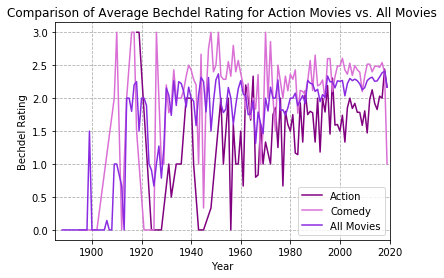

In [106]:
#Create axes
x_axis1 = Action_df["Year"]
y_axis1 = Action_df["rating"]

x_axis2 = Adult_df["Year"]
y_axis2 = Adult_df["rating"]

x_axis3 = Adventure_df["Year"]
y_axis3 = Adventure_df["rating"]

x_axis4 = Animation_df["Year"]
y_axis4 = Animation_df["rating"]

x_axis5 = Biography_df["Year"]
y_axis5 = Biography_df["rating"]

x_axis6 = Comedy_df["Year"]
y_axis6 = Comedy_df["rating"]

x_axis7 = Crime_df["Year"]
y_axis7 = Crime_df["rating"]

x_axis8 = Documentary_df["Year"]
y_axis8 = Documentary_df["rating"]

x_axis9 = Drama_df["Year"]
y_axis9 = Drama_df["rating"]

x_axis10 = Family_df["Year"]
y_axis10 = Family_df["rating"]

x_axis11 = Fantasy_df["Year"]
y_axis11 = Fantasy_df["rating"]

x_axis12 = FilmNoir_df["Year"]
y_axis12 = FilmNoir_df["rating"]

x_axis13 = Horror_df["Year"]
y_axis13 = Horror_df["rating"]

x_axis14 = Musical_df["Year"]
y_axis14 = Musical_df["rating"]

x_axis15 = Mystery_df["Year"]
y_axis15 = Mystery_df["rating"]

x_axis16 = Romance_df["Year"]
y_axis16 = Romance_df["rating"]

x_axis17 = SciFi_df["Year"]
y_axis17 = SciFi_df["rating"]

x_axis18 = Short_df["Year"]
y_axis18 = Short_df["rating"]

x_axis19 = Thriller_df["Year"]
y_axis19 = Thriller_df["rating"]

x_axis20 = War_df["Year"]
y_axis20 = War_df["rating"]

x_axis21 = Western_df["Year"]
y_axis21 = Western_df["rating"]

#Create line chart showing average Bechdel rating by year
Action = plt.plot(x_axis1, y_axis1, label="Action", color="purple") #interesting
##Adult = plt.plot(x_axis2, y_axis2, label="Adult")
#Adventure = plt.plot(x_axis3, y_axis3, label="Adventure")
#Animation = plt.plot(x_axis4, y_axis4, label="Animation")
#Biography = plt.plot(x_axis5, y_axis5, label="Biography")
Comedy = plt.plot(x_axis6, y_axis6, label="Comedy", color="orchid") #interesting
#Crime = plt.plot(x_axis7, y_axis7, label="Crime")
##Documentary = plt.plot(x_axis8, y_axis8, label="Documentary")
#Drama = plt.plot(x_axis9, y_axis9, label="Drama") #interesting
##Family = plt.plot(x_axis10, y_axis10, label="Family")
##Fantasy = plt.plot(x_axis11, y_axis11, label="Fantasy")
##FilmNoir = plt.plot(x_axis12, y_axis12, label="FilmNoir")
#Horror = plt.plot(x_axis13, y_axis13, label="Horror") #ok
##Musical = plt.plot(x_axis14, y_axis14, label="Musical")
##Mystery = plt.plot(x_axis15, y_axis15, label="Mystery")
##Romance = plt.plot(x_axis16, y_axis16, label="Romance")
##SciFi = plt.plot(x_axis17, y_axis17, label="SciFi")
##Short = plt.plot(x_axis18, y_axis18, label="Short")
##Thriller = plt.plot(x_axis19, y_axis19, label="Thriller")
##War = plt.plot(x_axis20, y_axis20, label="War")
##Western = plt.plot(x_axis21, y_axis21, label="Western")
Actgraph = plt.plot(x_axis, y_axis, label = "All Movies", color='blueviolet')

# Give our graph axis labels
plt.xlabel("Year")
plt.ylabel("Bechdel Rating")
plt.title("Comparison of Average Bechdel Rating for Action Movies vs. All Movies")
plt.grid(linestyle = "--")
plt.xlim(1885,2020)
plt.legend()
plt.show()

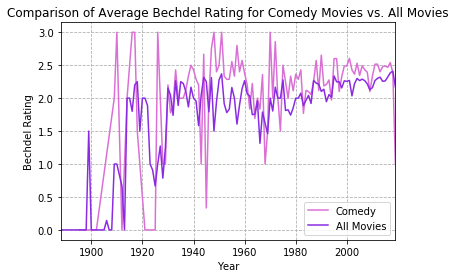

In [112]:
Comedy = plt.plot(x_axis6, y_axis6, label="Comedy", color="orchid")
ComYear = plt.plot(x_axis, y_axis, label = "All Movies", color='blueviolet')

# Give our graph axis labels
plt.xlabel("Year")
plt.ylabel("Bechdel Rating")
plt.title("Comparison of Average Bechdel Rating for Comedy Movies vs. All Movies")
plt.grid(linestyle = "--")
plt.legend()
plt.xlim(1888,2019)
plt.show()

In [16]:
#Group dataframe by main genre and calculate mean
GroupBy_Genre = df.groupby("Main Genre").mean()
GroupBy_Genre.head()

,Metascore,Year,imdbRating,rating
Main Genre,,,,
Action,52.784715,2001.713576,6.374482,1.787252
Adult,NaN,1990.000000,6.550000,3.000000
Adventure,59.737589,1991.650000,6.667198,1.872727
Animation,65.208904,2000.913284,6.907749,2.029520
Biography,67.807829,1998.939633,7.153806,2.207349


In [17]:
#Convert to dataframe
Genre_df = pd.DataFrame(GroupBy_Genre["rating"])

#Reindex dataframe
Genre_df = Genre_df.reset_index()

#Sort descending
Genre_df = Genre_df.sort_values(by=["rating"])

#Show dataframe
Genre_df.head(30)


,Main Genre,rating
17,Short,0.448276
20,Western,1.076923
19,War,1.500000
16,Sci-Fi,1.571429
11,Film-Noir,1.750000
0,Action,1.787252
18,Thriller,1.864865
2,Adventure,1.872727
14,Mystery,1.924528
7,Documentary,1.978723


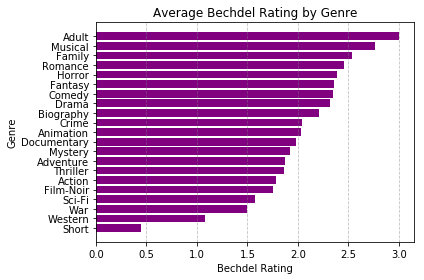

In [158]:
plt.barh(Genre_df["Main Genre"], Genre_df["rating"],  facecolor="purple")

plt.title("Average Bechdel Rating by Genre")
plt.xlabel("Bechdel Rating")
plt.ylabel("Genre")
plt.tight_layout()
plt.grid(axis='x', color='gray', alpha=0.5, linestyle = "--")

plt.savefig("SHartje_avg_BechdelbyGenre.png")

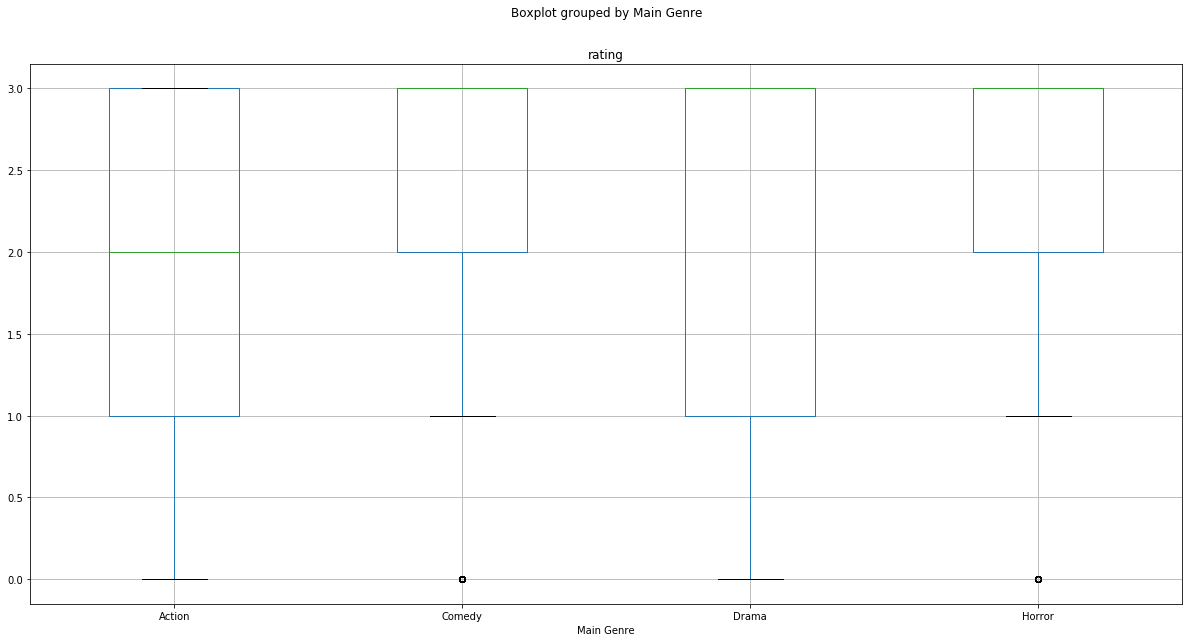

In [19]:
Action_Comedy_df = df.loc[(df['Main Genre'] == "Action") | (df["Main Genre"] == "Comedy") | (df["Main Genre"] == "Drama") | (df["Main Genre"] == "Horror")]

# Create a boxplot to compare means
Action_Comedy_df.boxplot("rating", by="Main Genre", figsize=(20, 10))

In [20]:
group1 = df[df["Main Genre"] == "Action"]["rating"]
group2 = df[df["Main Genre"] == "Comedy"]["rating"]
group3 = df[df["Main Genre"] == "Drama"]["rating"]
group4 = df[df["Main Genre"] == "Horror"]["rating"]

In [21]:
stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=91.56279910472134, pvalue=7.287356291141176e-58)

In [22]:
Action = Action_Comedy_df.loc[Action_Comedy_df["Main Genre"] == "Action"]
Action = Action[["Year","rating"]]
Action_Group = Action.groupby("Year").mean()
Action_df = pd.DataFrame(Action_Group)
Action_df = Action_df.reset_index()

Comedy = Action_Comedy_df.loc[Action_Comedy_df["Main Genre"] == "Comedy"]
Comedy = Comedy[["Year","rating"]]
Comedy_Group = Comedy.groupby("Year").mean()
Comedy_df = pd.DataFrame(Comedy_Group)
Comedy_df = Comedy_df.reset_index()
Comedy_df.head()

,Year,rating
0,1895,0.0
1,1900,0.0
2,1901,0.0
3,1902,0.0
4,1909,2.0


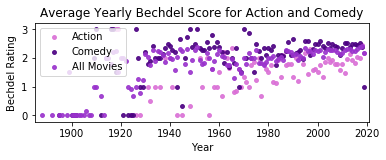

In [135]:

population1 = Action_df["rating"]
population2 = Comedy_df["rating"]
population3 = Year_df["rating"]

# Scatter Plot of Data
plt.subplot(2, 1, 1)
plt.scatter(Action_df["Year"], population1, label="Action", color = "orchid", s = 15, alpha = 0.9, marker = "o")
plt.scatter(Comedy_df["Year"], population2, label="Comedy", color = "indigo", s = 15, alpha = 0.9, marker = "o")
plt.scatter(Year_df["Year"], population3, label="All Movies", color = "darkorchid", s = 15, alpha = 0.9, marker = "o")
plt.xlim(1885,2021)
plt.legend(loc=2)


plt.title("Average Yearly Bechdel Score for Action and Comedy")
plt.xlabel("Year")
plt.ylabel("Bechdel Rating")

plt.savefig("SHartje_avg_ActionComedyScatter.png")

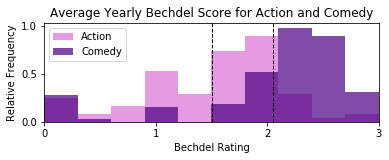

In [128]:
# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(population1, 10, density=True, alpha=0.7, label="Action", color = "orchid")
plt.hist(population2, 10, density=True, alpha=0.7, label="Comedy", color = "indigo")
plt.axvline(population1.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(population2.mean(), color='k', linestyle='dashed', linewidth=1)
plt.xticks(range(0, 4))
plt.xlim([0, 3])
plt.legend()  

plt.title("Average Yearly Bechdel Score for Action and Comedy")
plt.xlabel("Bechdel Rating")
plt.ylabel("Relative Frequency")

plt.savefig("SHartje_avg_ActionComedyHist.png")

In [24]:
stats.ttest_ind(population1, population2, equal_var=False)

Ttest_indResult(statistic=-5.273716227179323, pvalue=3.6926808145131646e-07)

In [33]:
Action_Mean = population1.mean()
Action_Mean

1.5034686937617772

In [34]:
Comedy_Mean = population2.mean()
Comedy_Mean

2.04783303102195